In [96]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

pd.options.mode.chained_assignment = None

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#reading the data
df = pd.read_csv(r'C:\Users\Dell\OneDrive\PortfolioProject\MoviePy\movies.csv')

In [97]:
#Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [98]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [99]:
#Data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [100]:
#Changing data types for more clarity
#df['votes'] = df['votes'].astype('int64')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype('int64')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce').fillna(0).astype('int64')

In [101]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [102]:
#Dropping rows with null values
df = df.dropna()

In [103]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [104]:
#Correct year of release
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [105]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [44]:
#pd.set_option('display.max_rows', None)

In [106]:
#Sorting by gross highest to lowest
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [107]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [46]:
#Drop Duplicates
# df['company']=df['company'].drop_duplicates().sort_values(ascending=False)
# df.drop_duplicates()

In [47]:
#Hypothesis -- Budget me have high correlation with gross
#           -- Company me have high correlation with gross

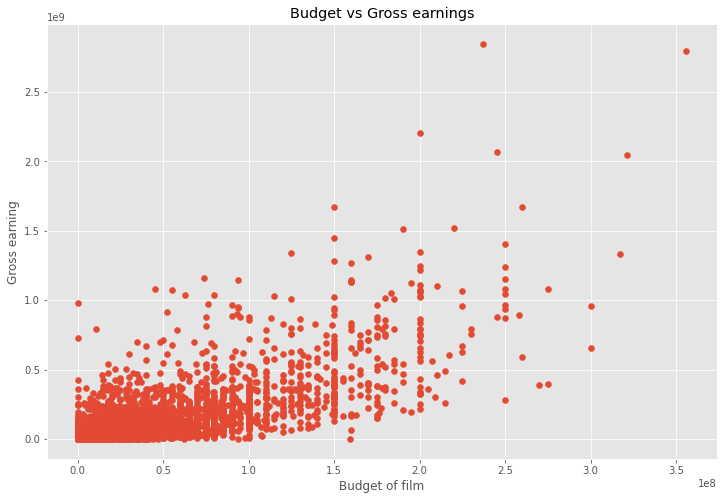

In [108]:
#Scatter plot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget of film')
plt.ylabel('Gross earning')
plt.show()

In [109]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

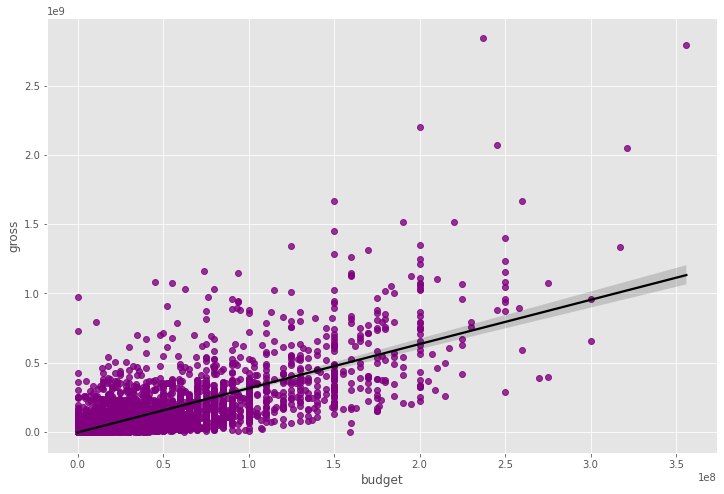

In [110]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"purple"}, line_kws={"color":"black"})

In [58]:
#Correlation

In [111]:
df.corr() #only gives correlation of numeric data type columns
          #by default pearson correlation, other is kendall, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102175,0.226837,0.314867,0.264663,0.119607,0.997467
score,0.102175,1.000000,0.411938,0.056721,0.188278,0.400518,0.109646
votes,0.226837,0.411938,1.000000,0.485280,0.632990,0.308908,0.222260
budget,0.314867,0.056721,0.485280,1.000000,0.750541,0.269169,0.305556
gross,0.264663,0.188278,0.632990,0.750541,1.000000,0.244585,0.257652
runtime,0.119607,0.400518,0.308908,0.269169,0.244585,1.000000,0.119317
yearcorrect,0.997467,0.109646,0.222260,0.305556,0.257652,0.119317,1.000000


In [60]:
#High correlation between budget and gross

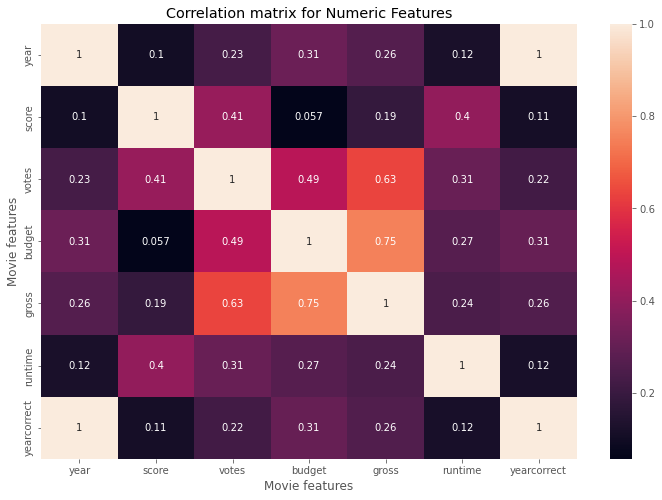

In [112]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [62]:
#Let's find Correlation between company and gross
#company is object

In [113]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [114]:
#Let's numerize the object columns
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,688,7.8,1100000,1137,1756,2283,55,237000000,2847246203,2208,162,2009
7445,529,5,0,2019,180,8.4,903000,160,729,2192,55,356000000,2797501328,1571,181,2019
3045,6812,5,6,1997,696,7.8,1100000,1137,1756,1560,55,200000000,2201647264,2208,194,1997
6663,5076,5,0,2015,690,7.8,876000,1107,2518,508,55,245000000,2069521700,1505,138,2015
7244,530,5,0,2018,189,8.4,897000,160,729,2192,55,321000000,2048359754,1571,149,2018


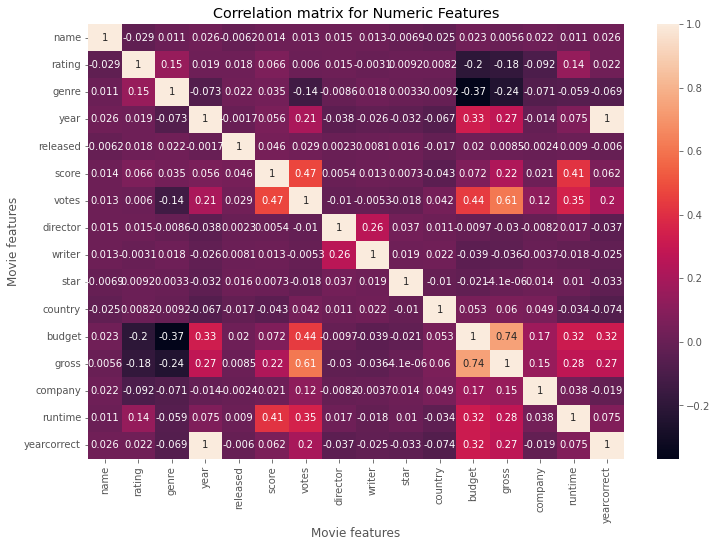

In [65]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [115]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011926,0.015273,0.013532,-0.009912,0.016160,0.013176,0.009608,0.010240,0.005685,-0.009931,0.020833,0.006813,0.010070,0.011022,0.012728
rating,-0.011926,1.000000,0.117582,0.024963,0.024328,0.011563,0.016093,0.017204,-0.004418,0.005904,0.037727,-0.126813,-0.128904,-0.076808,0.069069,0.025188
genre,0.015273,0.117582,1.000000,-0.088343,0.030695,0.040283,-0.148349,-0.013510,0.007126,-0.003532,-0.031558,-0.342085,-0.240830,-0.068678,-0.043496,-0.084726
year,0.013532,0.024963,-0.088343,1.000000,-0.002144,0.102175,0.226837,-0.022760,-0.012146,-0.027682,-0.070200,0.314867,0.264663,-0.009019,0.119607,0.997467
released,-0.009912,0.024328,0.030695,-0.002144,1.000000,0.043232,0.016893,-0.001869,-0.003640,0.018023,-0.022131,0.009975,-0.000151,-0.008573,0.000455,-0.006635
score,0.016160,0.011563,0.040283,0.102175,0.043232,1.000000,0.411938,0.008068,0.018887,-0.002199,-0.130146,0.056721,0.188278,0.000309,0.400518,0.109646
votes,0.013176,0.016093,-0.148349,0.226837,0.016893,0.411938,1.000000,-0.000628,0.000127,-0.020978,0.069565,0.485280,0.632990,0.129593,0.308908,0.222260
director,0.009608,0.017204,-0.013510,-0.022760,-0.001869,0.008068,-0.000628,1.000000,0.297451,0.037570,0.015246,0.004141,-0.015028,0.001337,0.017332,-0.022091
writer,0.010240,-0.004418,0.007126,-0.012146,-0.003640,0.018887,0.000127,0.297451,1.000000,0.026591,0.015011,-0.027080,-0.023873,0.003041,-0.005499,-0.011845
star,0.005685,0.005904,-0.003532,-0.027682,0.018023,-0.002199,-0.020978,0.037570,0.026591,1.000000,-0.017623,-0.021928,-0.001471,0.009317,0.008422,-0.028095


In [92]:
#unstack the above matrix
# correlation_matx = df_numerized.corr()
# correlation_pairs = correlation_matx.unstack()
# correlation_pairs

In [93]:
# sorted_pairs = correlation_pairs.sort_values()
# sorted_pairs

In [116]:
high_correlation = sorted_pairs[(sorted_pairs)>0.5]
high_correlation

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#CONCLUSION: Votes and budget have the highest correlation with the gross earnings.